# Performance of the Best Goal Scorers in International Football
oleh Bintang Sirius

# Gambaran Umum

## Latar Belakang
Sepak bola internasional adalah salah satu olahraga paling populer di dunia, dengan pemain-pemain legendaris yang meninggalkan jejak melalui pencapaian luar biasa, seperti mencetak lebih dari 50 gol internasional. Rekor ini mencerminkan tidak hanya kehebatan individu, tetapi juga kontribusi mereka terhadap kesuksesan tim nasional mereka. Dengan menganalisis performa para pemain ini, kita dapat memperoleh wawasan yang berharga tentang pola pencapaian, evolusi performa, serta dampak mereka terhadap perkembangan sepak bola global.

Dataset ini memberikan informasi terperinci tentang pemain dengan 50+ gol internasional, termasuk jumlah gol, jumlah pertandingan, rata-rata gol per pertandingan, dan durasi karir mereka. Data ini memungkinkan kita untuk menjawab berbagai pertanyaan, seperti siapa pemain paling efisien, bagaimana kontribusi masing-masing negara, dan bagaimana tren pencetak gol telah berubah selama beberapa dekade terakhir.

## Tujuan
Berikut adalah tujuan dari penelitian ini:
1. Mengidentifikasi pemain dengan rasio gol per pertandingan tertinggi dalam sejarah sepak bola internasional.
2. Menganalisis kontribusi negara-negara terhadap daftar pemain pencetak gol terbanyak dan hubungannya dengan perkembangan sepak bola di wilayah tersebut.
3. Mengungkap tren historis pencapaian gol internasional, termasuk perubahan pola pencapaian dari era ke era.
4. Memberikan wawasan yang relevan bagi peneliti, analis, dan penggemar sepak bola mengenai dampak pencetak gol terhadap kesuksesan tim nasional.

## Metriks Bisnis
1. _Goals per Match (GPM)_: Mengukur efisiensi pemain dalam mencetak gol per pertandingan internasional.
2. _Total Goals Scored_: Jumlah keseluruhan gol yang mencerminkan performa dan kontribusi pemain.
3. _Career Longevity_: Rentang waktu karir internasional yang menunjukkan konsistensi performa pemain.
4. _Nation's Representation_: Jumlah pemain dari masing-masing negara, mencerminkan tingkat pengembangan dan dominasi sepak bola negara tersebut.
5. _Timeline of 50th Goal Achievement_: Waktu yang diperlukan pemain untuk mencapai milestone 50 gol, sebagai indikator percepatan performa.

# Exploratory Data Analysis (EDA)

## Load Dataset

In [8]:
# 1. Import Package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [9]:
# 2. Import Dataset
df = pd.read_excel('dataset.xlsx')

In [10]:
df.sample(5)

,Rank,Player,Nation,Confederation,Goals,Caps,Goals per match,Career span begin,Career span last,Date of 50th goal
14,14,Sándor Kocsis,Hungary,UEFA,75,68,1.10,1948.0,1956,1954-09-19
65,63,Jon Dahl Tomasson,Denmark,UEFA,52,112,0.46,1997.0,2010,2007-11-21
48,47,Clint Dempsey,United States,CONCACAF,57,141,0.40,2004.0,2018,2016-06-07
40,39,David Villa,Spain,UEFA,59,98,0.60,2005.0,2017,2011-10-11
29,27,Robbie Keane,Republic of Ireland,UEFA,68,146,0.47,1998.0,2016,2011-06-04


## Eksplorasi Dataset

### 1. Deskripsi Data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Rank               82 non-null     int64         
 1   Player             82 non-null     object        
 2   Nation             82 non-null     object        
 3   Confederation      82 non-null     object        
 4   Goals              82 non-null     int64         
 5   Caps               82 non-null     int64         
 6   Goals per match    82 non-null     float64       
 7   Career span begin  65 non-null     float64       
 8   Career span last   82 non-null     int64         
 9   Date of 50th goal  82 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 6.5+ KB


Terlihat pada tabel diatas bahwa seluruh _feature_ sudah memiliki kesesuaian dengan tipe data nya. Oleh karena itu, tidak akan ada perubahan tipe data pada semua _feature_ tersebut.

### 2. Pemeriksaan _Value_ dari Setiap *Feature*

In [16]:
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64' or df[col].dtypes == 'object':
        print("{} values: {}".format(col,df[col].unique()))
        print('-' * 100)

Rank have 31 unique values: int64
Rank values: [ 1  2  3  4  5  6  8 10 12 13 14 18 19 22 25 27 31 32 33 34 35 38 39 44
 47 52 55 62 63 69 76]
----------------------------------------------------------------------------------------------------
Player have 82 unique values: object
Player values: ['Cristiano Ronaldo' 'Lionel Messi' 'Ali Daei' 'Sunil Chhetri'
 'Mokhtar Dahari' 'Ali Mabkhout' 'Romelu Lukaku' 'Ferenc Puskás'
 'Robert Lewandowski' 'Godfrey Chitalu' 'Neymar' 'Hussein Saeed' 'Pelé'
 'Vivian Woodward' 'Sándor Kocsis' 'Kunishige Kamamoto' 'Bashar Abdullah'
 'Majed Abdullah' 'Kinnah Phiri' 'Kiatisuk Senamuang' 'Miroslav Klose'
 'Piyapong Pue-on' 'Abdul Kadir' 'Stern John' 'Luis Suárez'
 'Hossam Hassan' 'Gerd Müller' 'Harry Kane' 'Carlos Ruiz' 'Robbie Keane'
 'Edin Džeko' 'Didier Drogba' 'Teerasil Dangda' 'Jasem Al-Huwaidi'
 'Ronaldo' 'Ahmed Radhi' 'Zlatan Ibrahimovic' 'Abdul Ghani Minhat'
 'Imre Schlosser' 'Aleksandar Mitrovi?' 'David Villa' 'Mohamed Salah'
 'Almoez Ali' 'Ali Ash

### 3. Pemeriksaan Null dan _Value_ Duplikat

In [18]:
# 1. Checking Missing Value
((df.isna().sum())/len(df)*100).round(2).sort_values(ascending=False)

Career span begin    20.73
Rank                  0.00
Player                0.00
Nation                0.00
Confederation         0.00
Goals                 0.00
Caps                  0.00
Goals per match       0.00
Career span last      0.00
Date of 50th goal     0.00
dtype: float64

Jika dilihat pada tabel _sample_ sebelumnya, terlihat bahwa beberapa pemain memiliki _career span begin_ yang tidak diketahui. Oleh karena itu, hal ini masih dapat diwajari dan tidak seharusnya dihapus.

In [20]:
# 2. Checking Duplicated Value
df.duplicated().sum()

0

Dikarenakan sudah tidak ada nilai duplikat, maka tidak akan ada penghapusan nilai duplikat pada data tersebut.

### 4. Fitur Numerik

In [23]:
# 1. Statistical Descriptive
df.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
Rank,82.0,39.93,1.0,19.75,39.0,60.25,76.0,22.87
Goals,82.0,64.38,50.0,53.5,59.0,70.75,135.0,15.32
Caps,82.0,115.22,38.0,97.25,112.5,135.5,217.0,31.76
Goals per match,82.0,0.6,0.29,0.47,0.57,0.63,1.42,0.21
Career span begin,65.0,1984.92,1903.0,1973.0,1993.0,2002.0,2011.0,23.9
Career span last,82.0,2001.4,1914.0,1997.0,2009.0,2015.0,2024.0,22.06
Date of 50th goal,82,2004-08-09 04:23:24.878048768,1952-07-24 00:00:00,1997-05-10 00:00:00,2011-07-19 12:00:00,2017-06-09 00:00:00,2025-06-14 00:00:00,NaN


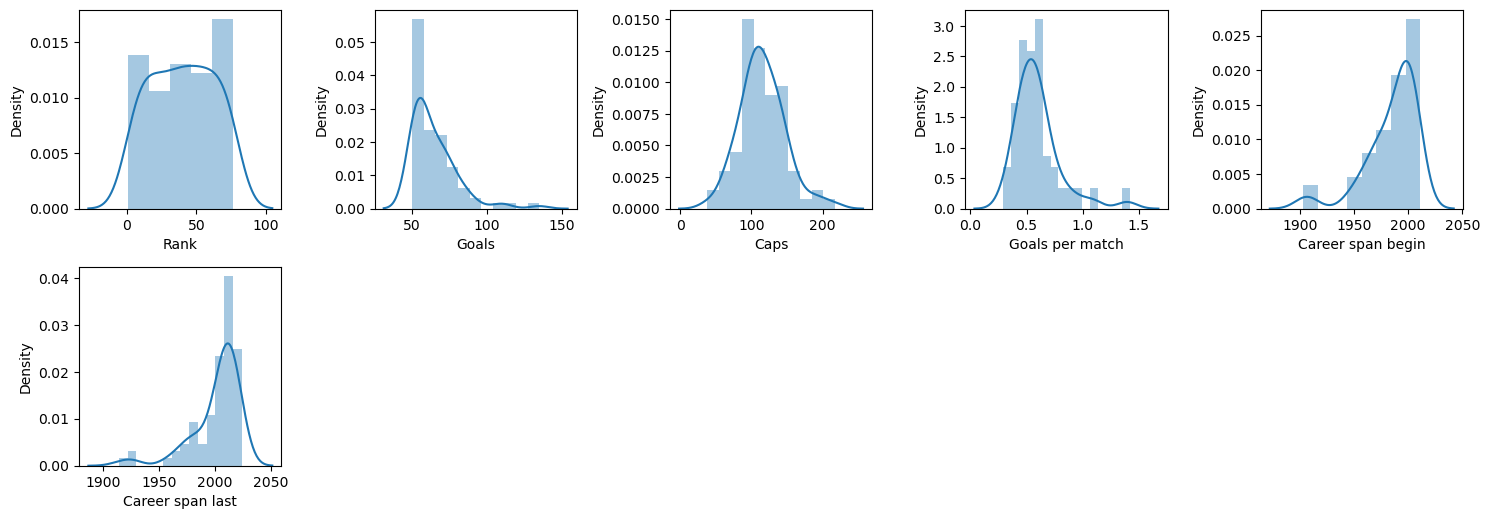

In [24]:
# 2. Checking the distribution of numerical features
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()

plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

Terdapat beberapa _insight_ menarik dari grafik diatas, yaitu:
1. _Feature_ `Goals` dan `Goals per match` bersifat ___positive skewed___ (terdistribusi positif), dimana sebagian besar bar atau titik data berada di sisi kiri grafik, dengan ekor panjang ke kanan, dan Mean > Median > Mode.
2. _Feature_ `Career span begin` dan `Career span last` bersifat ___negative skewed___ (terdistribusi negatif), dimana sebagian besar bar atau titik data berada di sisi kanan grafik, dengan ekor panjang ke kiri, dan Mean < Median < Mode.
3.  _Feature_ `Rank` dan `Caps` bersifat ___zero skewed / normal distibution___ (terdistribusi normal), dimana data terdistribusi secara merata di sekitar rata-rata (_mean_). Tidak ada _skewness_ (kemiringan), sehingga grafiknya terlihat tampak simetris.

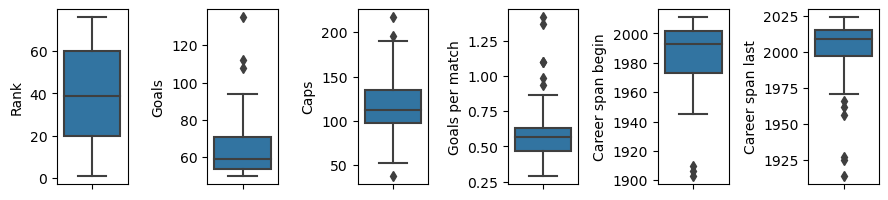

In [26]:
# 3. Checking outliers of numerical features
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

Boxplot ini memberikan gambaran menyeluruh tentang metrik performa pemain sepak bola internasional. Sebagian besar pemain mencetak gol antara 60 hingga 100, dengan beberapa pemain luar biasa mencetak lebih dari 120 gol yang menjadi outlier. Jumlah penampilan (caps) mayoritas berada pada kisaran 100 hingga 150, sementara beberapa pemain melampaui 200 caps, menunjukkan durasi karir yang sangat panjang. Efisiensi gol per pertandingan sebagian besar berkisar antara 0,5 hingga 0,75, dengan beberapa pemain mencapai lebih dari 1 gol per pertandingan.

Namun kembali lagi, hal ini akan diteliti lebih lanjut dengan menggunakan batasan kuartil 1 dan kuartil 3.

### 5. Fitur Kategorikal

In [29]:
# 1. Statistical Descriptive
df.describe(exclude=np.number).round(2).T

,count,unique,top,freq,mean,min,25%,50%,75%,max
Player,82,82,Cristiano Ronaldo,1,NaT,NaT,NaT,NaT,NaT,NaT
Nation,82,53,Iran,4,NaT,NaT,NaT,NaT,NaT,NaT
Confederation,82,6,AFC,34,NaT,NaT,NaT,NaT,NaT,NaT
Date of 50th goal,82,NaN,NaN,NaN,2004-08-09 04:23:24.878048768,1952-07-24,1997-05-10,2011-07-19 12:00:00,2017-06-09,2025-06-14


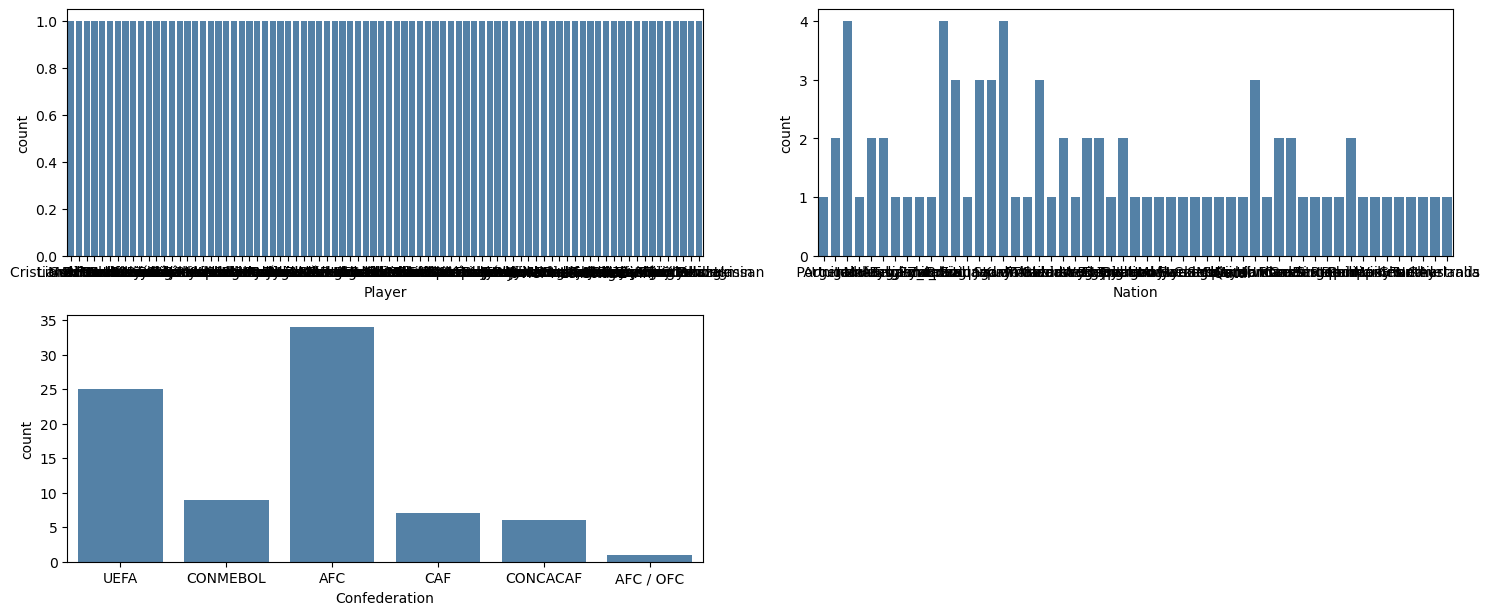

In [30]:
# 2. Checking the distribution of categorical features
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
plt.figure(figsize=(15, 15))
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[cats[i]], color='steelblue')
    plt.tight_layout()

# Data Cleaning

In [32]:
df_clean = df.copy()

## 1. Menangani Nilai Ekstrim
Pada tahapan ini, akan dilakukan penanganan data dengan nilai ekstrem (_outlier_), namun sebelumnya harus dihitung interkuartil untuk setiap kolom numerik, serta menghitung jangkauan minimum dan maksimum dari maing-masing _feature_ numeriknya.

In [34]:
# Memilih hanya kolom numerik
nums_column_df = df_clean.loc[:, (df_clean.dtypes == 'int64') | (df_clean.dtypes == float)].columns.tolist()

# Menghitung IQR untuk setiap kolom numerik dan menghitung jangkauan minimum dan maksimum
iqr_ranges_df = {}
for col in nums_column_df:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    min_range = Q1 - 1.5 * IQR
    max_range = Q3 + 1.5 * IQR
    iqr_ranges_df[col] = {'Min Range': min_range, 'Max Range': max_range}
    
# Menampilkan hasil
iqr_df = pd.DataFrame(iqr_ranges_df).T
iqr_df

,Min Range,Max Range
Rank,-41.000,121.000
Goals,27.625,96.625
Caps,39.875,192.875
Goals per match,0.230,0.870
Career span begin,1929.500,2045.500
Career span last,1970.000,2042.000


Terlihat pada tabel nilai _minimal range_ dan _maximum range_ dari data tersebut. Oleh karena itu, selanjutnya akan penanganan nilai yang berada diluar jangkauan _x_, dimana _min range_ ≤ _x_ ≤ _max range_ pada masing-masing _feature_.

In [35]:
# Feature Rank
df_clean.drop(df_clean[(df_clean['Rank'] < -41) | (df_clean['Rank'] > 121)].index, inplace=True)

# Feature Goals
df_clean.drop(df_clean[(df_clean['Goals'] < 27.625) | (df_clean['Goals'] > 96.625)].index, inplace=True)

# Feature Caps
df_clean.drop(df_clean[(df_clean['Caps'] < 39.875) | (df_clean['Caps'] > 192.875)].index, inplace=True)

# Feature Goals per match
df_clean.drop(df_clean[(df_clean['Goals per match'] < 0.23) | (df_clean['Goals per match'] > 0.87)].index, inplace=True)

# Feature Career span begin
df_clean.drop(df_clean[(df_clean['Career span begin'] < 1929.5) | (df_clean['Career span begin'] > 2045.5)].index, inplace=True)

# Feature Career span last
df_clean.drop(df_clean[(df_clean['Career span last'] < 1970) | (df_clean['Career span last'] > 2042)].index, inplace=True)

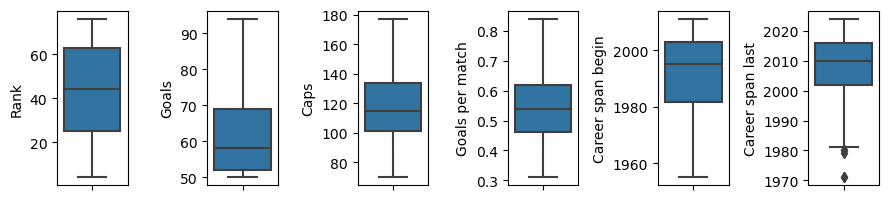

In [36]:
# Rechecking outliers of numerical features
nums_column_df = df_clean.loc[:, (df_clean.dtypes == 'int64') | (df_clean.dtypes == float)].columns.tolist()
plt.figure(figsize=(15, 4))
for i in range(0, len(nums_column_df)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df_clean[nums_column_df[i]], orient='v')
    plt.tight_layout()

Terlihat pada _boxplot_ diatas bahwa sudah tidak ada lagi nilai yang berada diluar jangkauan (_range_). Oleh karena itu, selanjutnya data _clean_ ini dapat disimpan untuk dilakukan visualisasi dan analisis lebih lanjut.

## 3. Pemeriksaan Ulang Data Setelah Dilakukan _Cleaning_

In [38]:
print('Jumlah data sebelum dilakukan cleaning :', df.shape[0])
print('Jumlah data setelah dilakukan cleaning :', df_clean.shape[0])

Jumlah data sebelum dilakukan cleaning : 82
Jumlah data setelah dilakukan cleaning : 70


## Menyimpan Dataset sebagai csv

In [40]:
df_clean.to_csv('dataset_clean.csv', index=False)